<ipython-input-21-f6951810795f>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


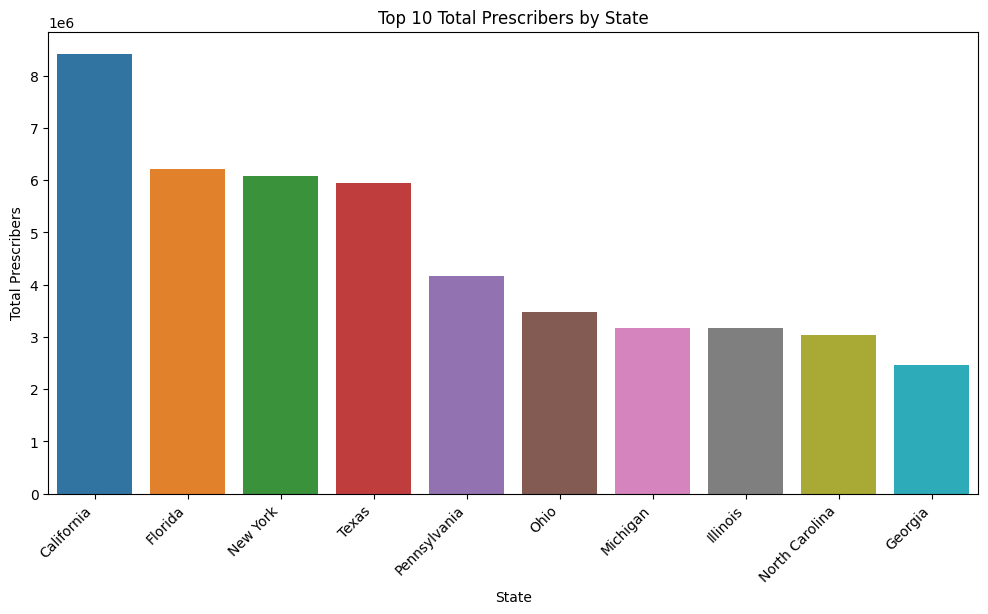

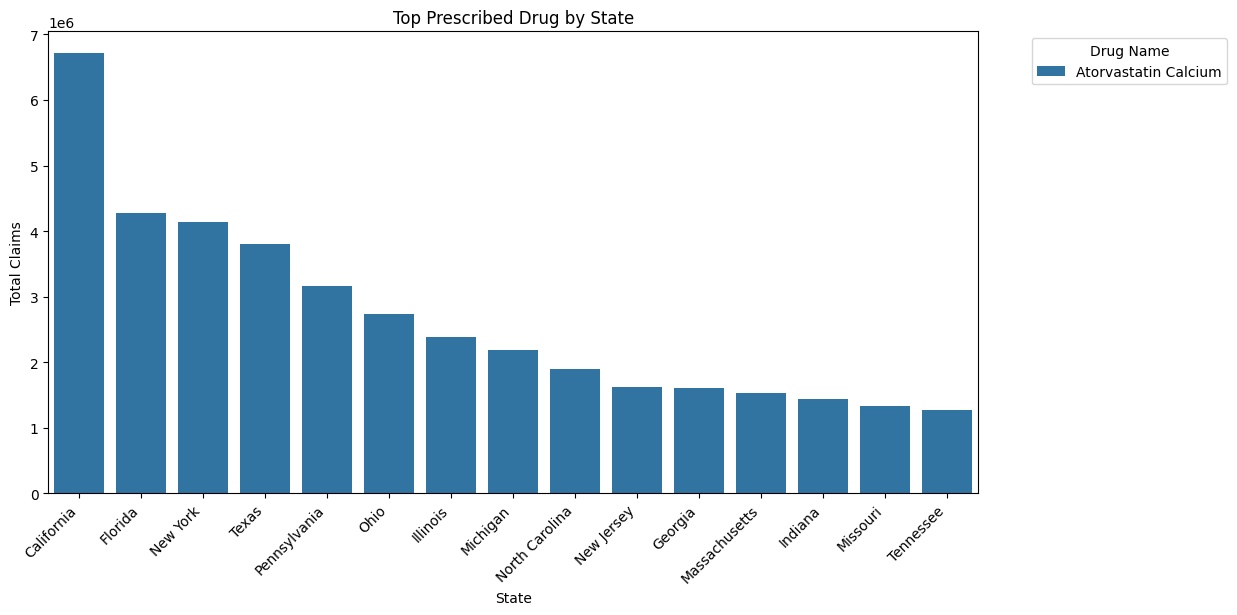

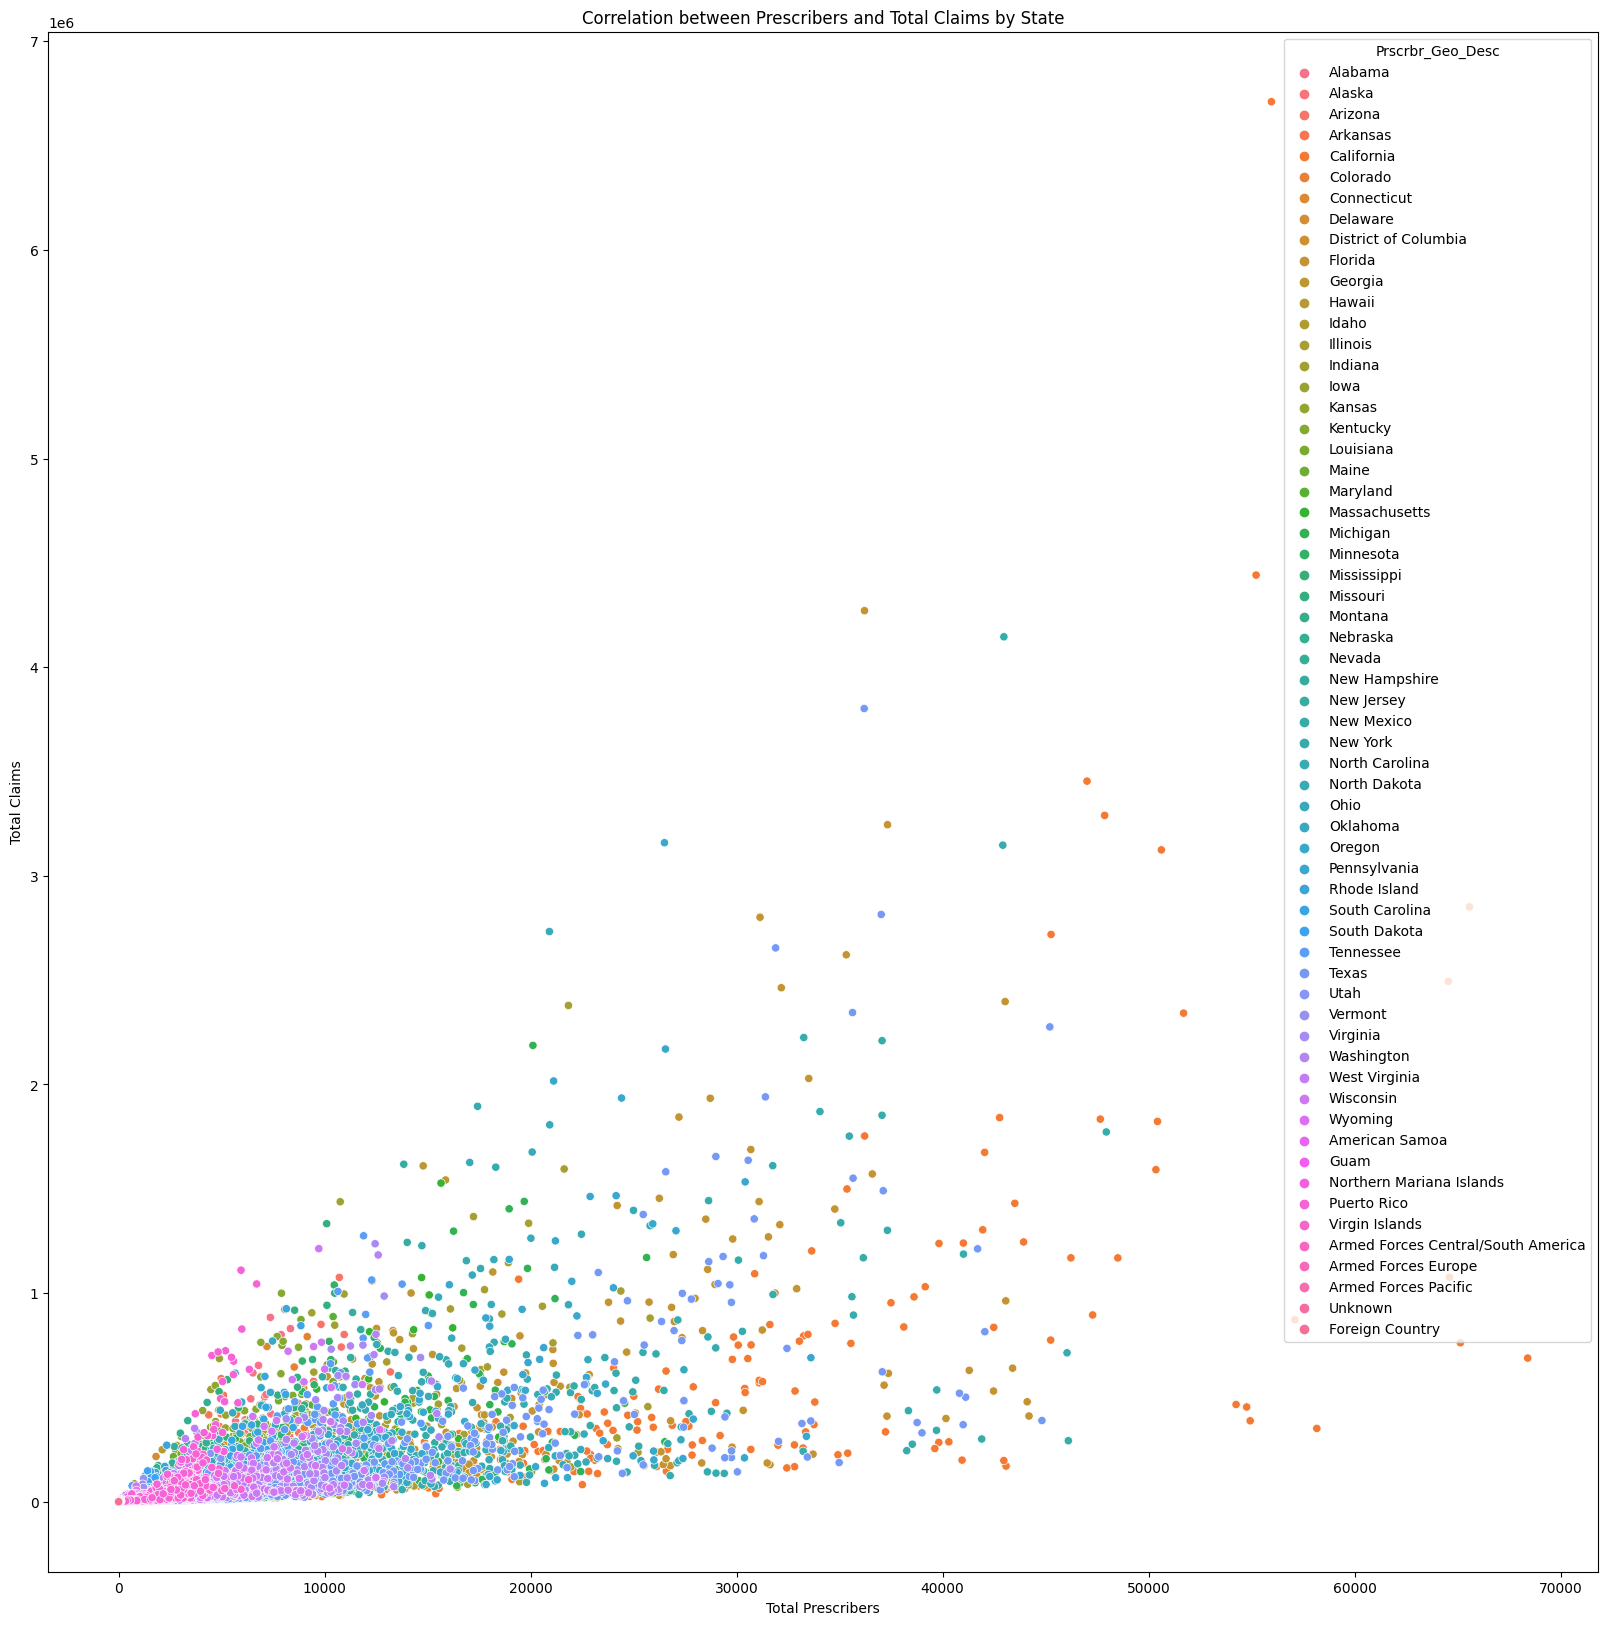

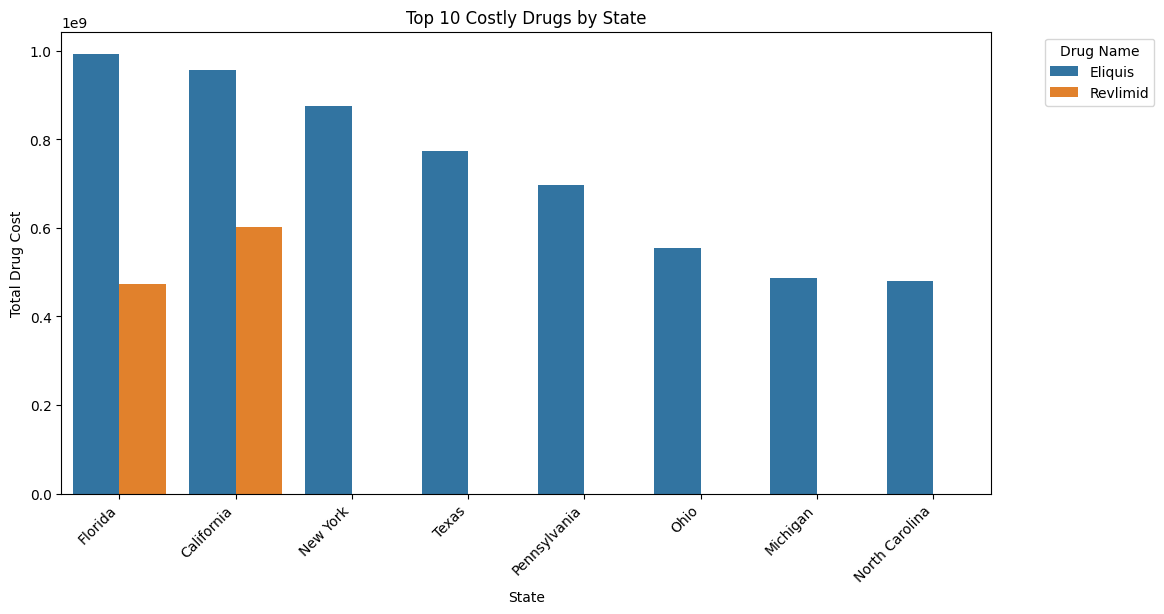

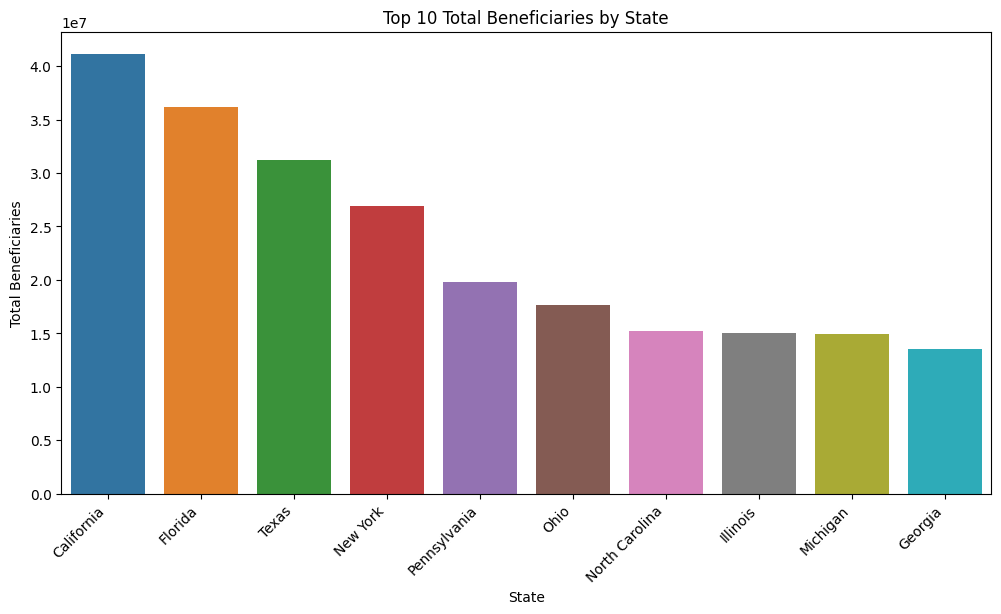

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'cms-drug-dataset-21_geo.csv'
df = pd.read_csv(file_path)

# Filter data for Prscrbr_Geo_Lvl = State
state_data = df[df['Prscrbr_Geo_Lvl'] == 'State']

# Display basic information about the filtered dataset
# print(state_data.info())

most_used_drugs = state_data.loc[state_data.groupby('Prscrbr_Geo_Desc')['Tot_Clms'].idxmax()][['Prscrbr_Geo_Desc', 'Brnd_Name', 'Tot_Clms']]
highest_cost_drugs = state_data.loc[state_data.groupby('Prscrbr_Geo_Desc')['Tot_Drug_Cst'].idxmax()][['Prscrbr_Geo_Desc', 'Brnd_Name', 'Tot_Drug_Cst']]


# Option 1: Prescriber Analysis by State
prescriber_counts = state_data.groupby('Prscrbr_Geo_Desc')['Tot_Prscrbrs'].sum().reset_index()
prescriber_counts_top10 = prescriber_counts.nlargest(10, 'Tot_Prscrbrs')
plt.figure(figsize=(12, 6))
sns.barplot(x='Prscrbr_Geo_Desc', y='Tot_Prscrbrs', data=prescriber_counts_top10)
plt.title('Top 10 Total Prescribers by State')
plt.xlabel('State')
plt.ylabel('Total Prescribers')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_prescribers_by_state.png')
plt.show()

# Option 2: Drug Prescription Analysis
top_drugs_statewise = state_data.groupby(['Prscrbr_Geo_Desc', 'Brnd_Name'])['Tot_Clms'].sum().reset_index()
top_drugs_statewise = top_drugs_statewise.sort_values(by='Tot_Clms', ascending=False).groupby('Prscrbr_Geo_Desc').head(1)
plt.figure(figsize=(12, 6))
sns.barplot(x='Prscrbr_Geo_Desc', y='Tot_Clms', hue='Brnd_Name', data=top_drugs_statewise.head(15))
plt.title('Top Prescribed Drug by State')
plt.xlabel('State')
plt.ylabel('Total Claims')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('top_drugs_by_state.png')
plt.show()

# Option 4: Prescriber and Prescription Correlation
plt.figure(figsize=(20, 20))
sns.scatterplot(x='Tot_Prscrbrs', y='Tot_Clms', hue='Prscrbr_Geo_Desc', data=state_data)
plt.title('Correlation between Prescribers and Total Claims by State')
plt.xlabel('Total Prescribers')
plt.ylabel('Total Claims')
plt.savefig('prescriber_prescription_correlation.png')
plt.show()

# Option 5: Cost Analysis
drug_cost_statewise = state_data.groupby(['Prscrbr_Geo_Desc', 'Brnd_Name'])['Tot_Drug_Cst'].sum().reset_index()
top_costly_drugs = drug_cost_statewise.sort_values(by='Tot_Drug_Cst', ascending=False).groupby('Prscrbr_Geo_Desc').head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x='Prscrbr_Geo_Desc', y='Tot_Drug_Cst', hue='Brnd_Name', data=top_costly_drugs.head(10))
plt.title('Top 10 Costly Drugs by State')
plt.xlabel('State')
plt.ylabel('Total Drug Cost')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('top_costly_drugs_by_state.png')
plt.show()

# Option 6: Beneficiary Analysis
beneficiary_counts = state_data.groupby('Prscrbr_Geo_Desc')['Tot_Benes'].sum().reset_index()
beneficiary_counts_top10 = beneficiary_counts.nlargest(10, 'Tot_Benes')
plt.figure(figsize=(12, 6))
sns.barplot(x='Prscrbr_Geo_Desc', y='Tot_Benes', data=beneficiary_counts_top10)
plt.title('Top 10 Total Beneficiaries by State')
plt.xlabel('State')
plt.ylabel('Total Beneficiaries')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_beneficiaries_by_state.png')
plt.show()

